In [65]:
pip install --upgrade seaborn

  Obtaining dependency information for seaborn from https://files.pythonhosted.org/packages/83/11/00d3c3dfc25ad54e731d91449895a79e4bf2384dc3ac01809010ba88f6d5/seaborn-0.13.2-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/294.9 kB ? eta -:--:--
   ---------------------------------------- 0.0/294.9 kB ? eta -:--:--
   - -------------------------------------- 10.2/294.9 kB ? eta -:--:--
   ----- --------------------------------- 41.0/294.9 kB 495.5 kB/s eta 0:00:01
   ------------------------------ --------- 225.3/294.9 kB 1.7 MB/s eta 0:00:01
   ---------------------------------------- 294.9/294.9 kB 2.0 MB/s eta 0:00:00
  Attempting uninstall: seaborn
    Found existing installation: seaborn 0.12.2
    Uninstalling seaborn-0.12.2:
      Successfully uninstalled seaborn-0.12.2
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

from sklearn.datasets import make_regression

In [39]:
# Generating a synthetic dataset
# 1000 samples, 3 features (square footage, number of bedrooms, number of bathrooms)
X, y = make_regression(n_samples=1000, n_features=3, noise=0.1)

# Converting to DataFrame
df = pd.DataFrame(X, columns=['SquareFootage', 'Bedrooms', 'Bathrooms'])
df['Price'] = y


In [40]:
# show information about data set
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SquareFootage  1000 non-null   float64
 1   Bedrooms       1000 non-null   float64
 2   Bathrooms      1000 non-null   float64
 3   Price          1000 non-null   float64
dtypes: float64(4)
memory usage: 31.4 KB


In [41]:
print(df.tail())

     SquareFootage  Bedrooms  Bathrooms       Price
995       0.375118  1.643374  -0.135027  126.200633
996       0.949702  0.908451   0.716876  164.855338
997      -2.120894 -0.413105   2.585876   96.136923
998       1.333868 -0.082301   0.168087   61.606223
999       0.214252  1.206031   0.380877  129.651482


In [42]:
# Check for missing values
print(df.isnull().sum())

SquareFootage    0
Bedrooms         0
Bathrooms        0
Price            0
dtype: int64


In [43]:
# Descriptive statistics
print(df.describe())

       SquareFootage     Bedrooms    Bathrooms        Price
count    1000.000000  1000.000000  1000.000000  1000.000000
mean       -0.032330    -0.018572    -0.018342    -4.200616
std         0.986763     0.979978     0.975179   114.694457
min        -2.901095    -3.146921    -3.134466  -372.617787
25%        -0.742011    -0.663970    -0.682686   -84.736285
50%        -0.041037    -0.023426    -0.041329    -7.517190
75%         0.652281     0.615140     0.647652    78.522445
max         3.293265     3.656868     3.612889   359.835198


In [44]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)


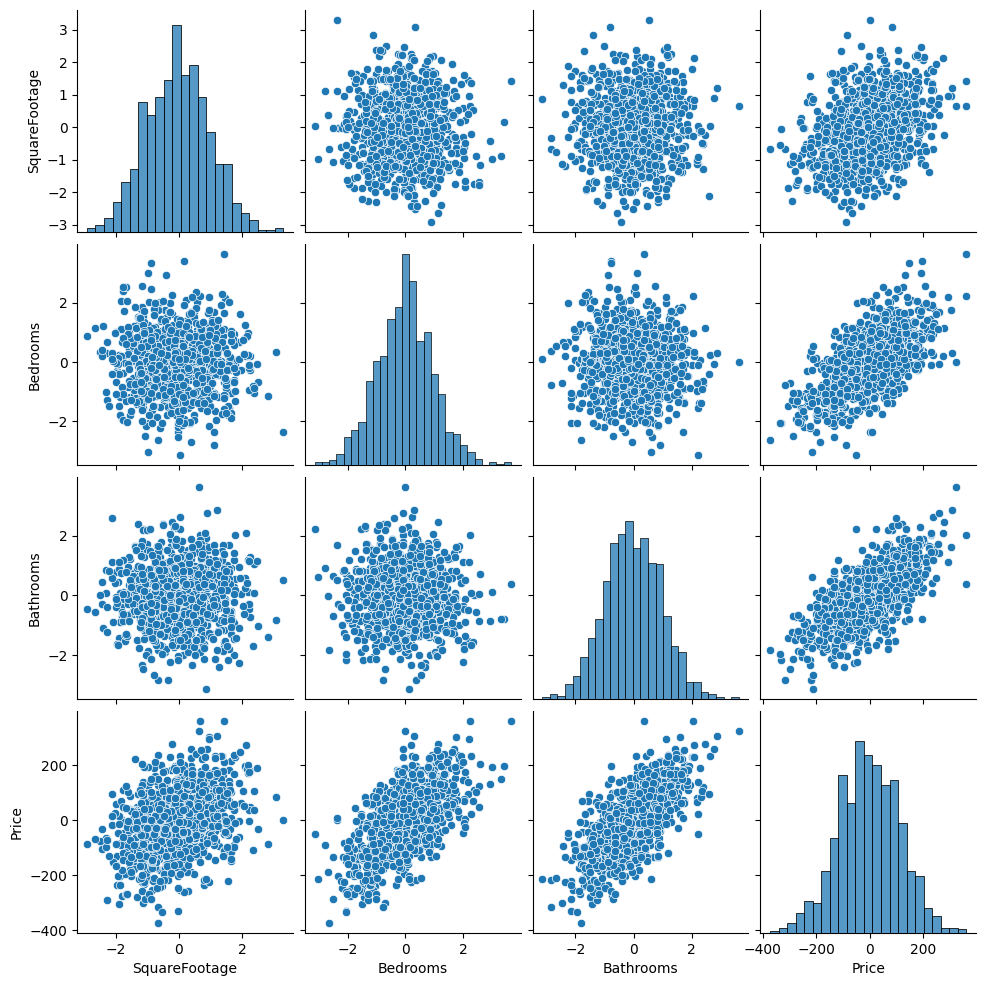

In [45]:
# Pairplot to visualize relationships
sns.pairplot(df)
plt.show()

In [46]:
# Splitting the data into training and testing sets
X = df[['SquareFootage', 'Bedrooms', 'Bathrooms']]
y = df['Price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [47]:
# Create the model
# Create and train the model
model = LinearRegression()
model.fit(X, y)

LinearRegression()

In [48]:
# Now custimize prediction testing

prediction = model.predict([[50, 1, 1]])
print(prediction)

# show house price here

[2175.63489066]


C:\Users\Vennila's gadget\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [49]:
# Make predictions
y_pred = model.predict(X_test)

In [50]:
# Mean Absolute Error
mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error (MAE): {mae}')

Mean Absolute Error (MAE): 0.08321168055761305


In [51]:
# Root Mean Squared Error
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'Root Mean Squared Error (RMSE): {rmse}')

Root Mean Squared Error (RMSE): 0.10239589962775192


In [52]:
# Mean Square Error
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 0.010484920260576645


In [53]:
# R-squared
r2 = r2_score(y_test, y_pred)
print(f'R-squared: {r2}')

R-squared: 0.9999991059321878


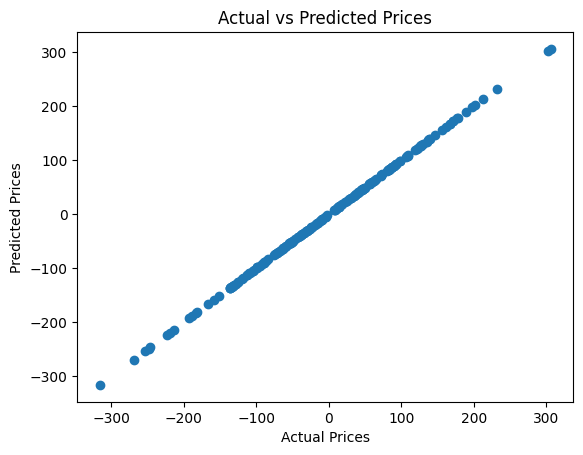

In [54]:
# Plotting the results
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Prices')
plt.show()

In [55]:
# Adjusted R-squared
n = len(y_test)
p = X_test.shape[1]
adjusted_r_squared = 1 - (1 - r2) * ((n - 1) / (n - p - 1))
print(f'Adjusted R-squared: {adjusted_r_squared}')

Adjusted R-squared: 0.9999990922474764


In [56]:
# Hypothesis function: h(X) = β0 + β1X1 + β2X2 + β3X3
print(f'Intercept (β0): {model.intercept_}')

Intercept (β0): -0.006886291012532908


In [57]:
print(f'Coefficients (β1, β2, β3): {model.coef_}')

Coefficients (β1, β2, β3): [40.38224937 74.39178583 82.13752254]


In [58]:
# Accuracy
accuracy = model.score(X_test, y_test)
print(f'Accuracy: {accuracy}')

Accuracy: 0.9999991059321878


In [59]:
#  know score
score = model.score( X, y )
print(score * 100)

99.99992243775208
